<a href="https://colab.research.google.com/github/Sezo-code/Michine-Learning/blob/main/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**

To identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments. For this, we need a dataset containing information about online payment fraud, so that we can understand what type of transactions lead to fraud. For this task, I collected a dataset from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments. Below are all the columns from the dataset I’m using here:

**step:** represents a unit of time where 1 step equals 1 hour

**type:** type of online transaction

**amount:** the amount of the transaction

**nameOrig:** customer starting the transaction

**oldbalanceOrg:** balance before the transaction

**newbalanceOrig:** balance after the transaction

**nameDest:** recipient of the transaction

**oldbalanceDest:** initial balance of recipient before the transaction

**newbalanceDest:** the new balance of recipient after the transaction

**isFraud:** fraud transaction

# **CREDIT CARD FRAUD DETECTION PROJECT REQUIREMENT**
[link text](https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection?resource=download)

Build a machine learning model to identify fraudulent credit card
transactions.
Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.
Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
Evaluate the model'

s performance using metrics like precision, recall,

and F1-score, and consider techniques like oversampling or
undersampling for improving results.

# **Step 1: Load the Dataset**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (Change filename if needed)
df = pd.read_csv("/content/onlinefraud.csv")


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151799 entries, 0 to 151798
Data columns (total 11 colu

In [2]:

# Display the first few rows
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  


In [3]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151799 entries, 0 to 151798
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            151799 non-null  int64  
 1   type            151799 non-null  object 
 2   amount          151799 non-null  float64
 3   nameOrig        151799 non-null  object 
 4   oldbalanceOrg   151799 non-null  float64
 5   newbalanceOrig  151798 non-null  float64
 6   nameDest        151798 non-null  object 
 7   oldbalanceDest  151798 non-null  float64
 8   newbalanceDest  151798 non-null  float64
 9   isFraud         151798 non-null  float64
 10  isFlaggedFraud  151798 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 12.7+ MB
None


In [4]:

# Checking for missing values
print(df.isnull().sum())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


# **Analyse the Data**

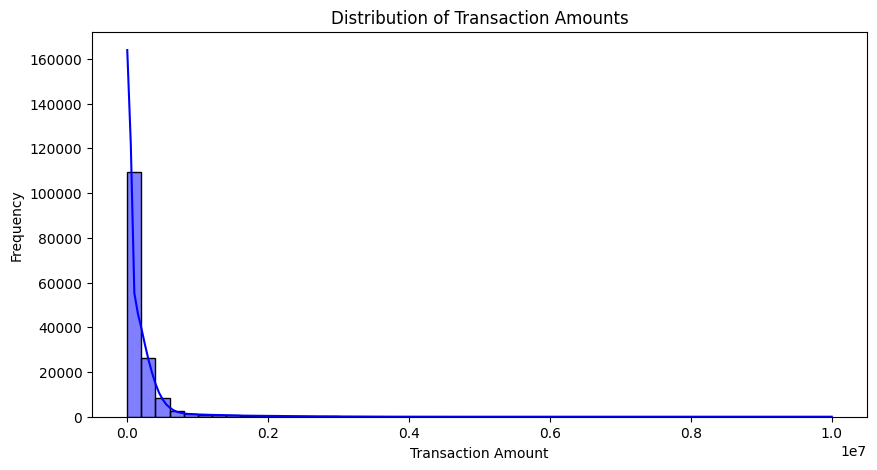

In [16]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 5))
sns.histplot(df['amount'], bins=50, kde=True, color='blue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()


<ipython-input-17-52c921a3d43c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='amount', data=df, palette=['green', 'red'])


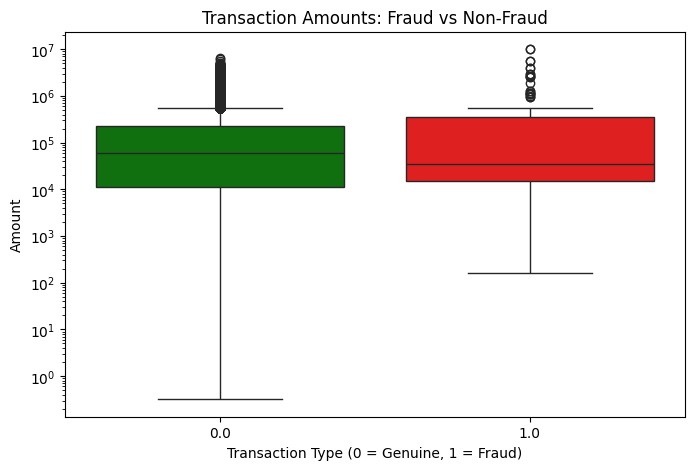

In [17]:
# Boxplot of transaction amounts by fraud status
plt.figure(figsize=(8, 5))
sns.boxplot(x='isFraud', y='amount', data=df, palette=['green', 'red'])
plt.title("Transaction Amounts: Fraud vs Non-Fraud")
plt.xlabel("Transaction Type (0 = Genuine, 1 = Fraud)")
plt.ylabel("Amount")
plt.yscale("log")  # Log scale to handle outliers
plt.show()


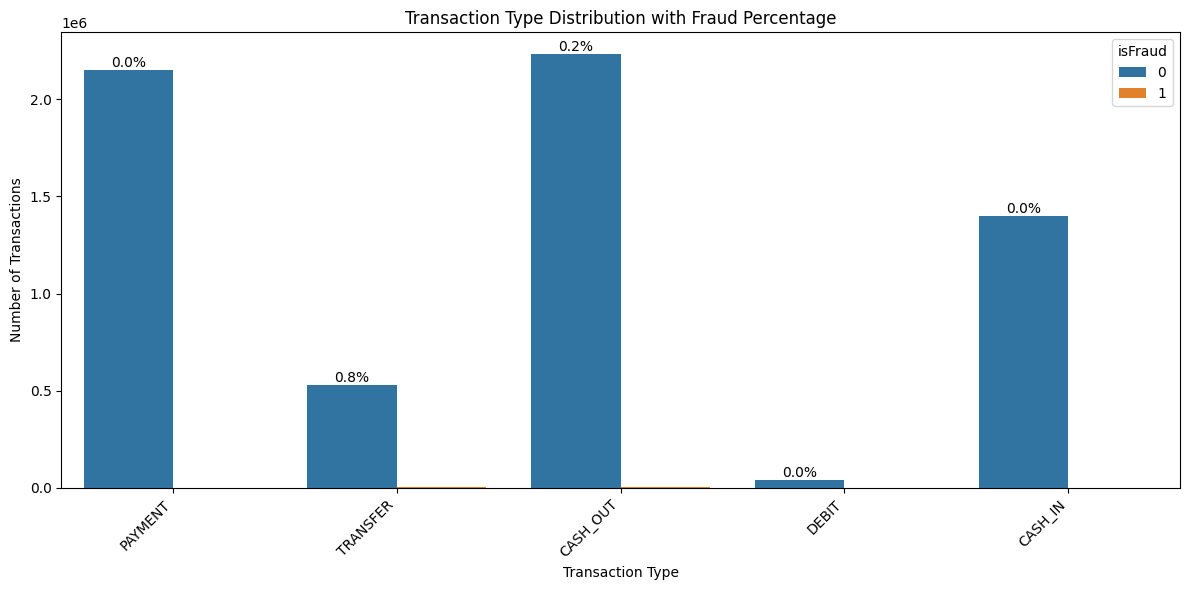

In [28]:
import matplotlib.pyplot as plt

# Calculate fraud percentage for each transaction type
fraud_percentage = df.groupby('type')['isFraud'].mean() * 100

# Get the unique transaction types and their corresponding x-axis positions
types = df['type'].unique()
x_positions = range(len(types))  # Create a sequence of integers for x-positions

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='type', data=df, hue='isFraud')  # Capture the Axes object
plt.title('Transaction Type Distribution with Fraud Percentage')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')

# Add labels with fraud percentage using a loop
for i, type_val in enumerate(types):
    height = ax.patches[i].get_height()  # Access patch height by index
    width = ax.patches[i].get_width()
    x = ax.patches[i].get_x() + width / 2
    y = height
    label = f'{fraud_percentage[type_val]:.1f}%'  # Access by type value
    plt.text(x, y + 200, label, ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

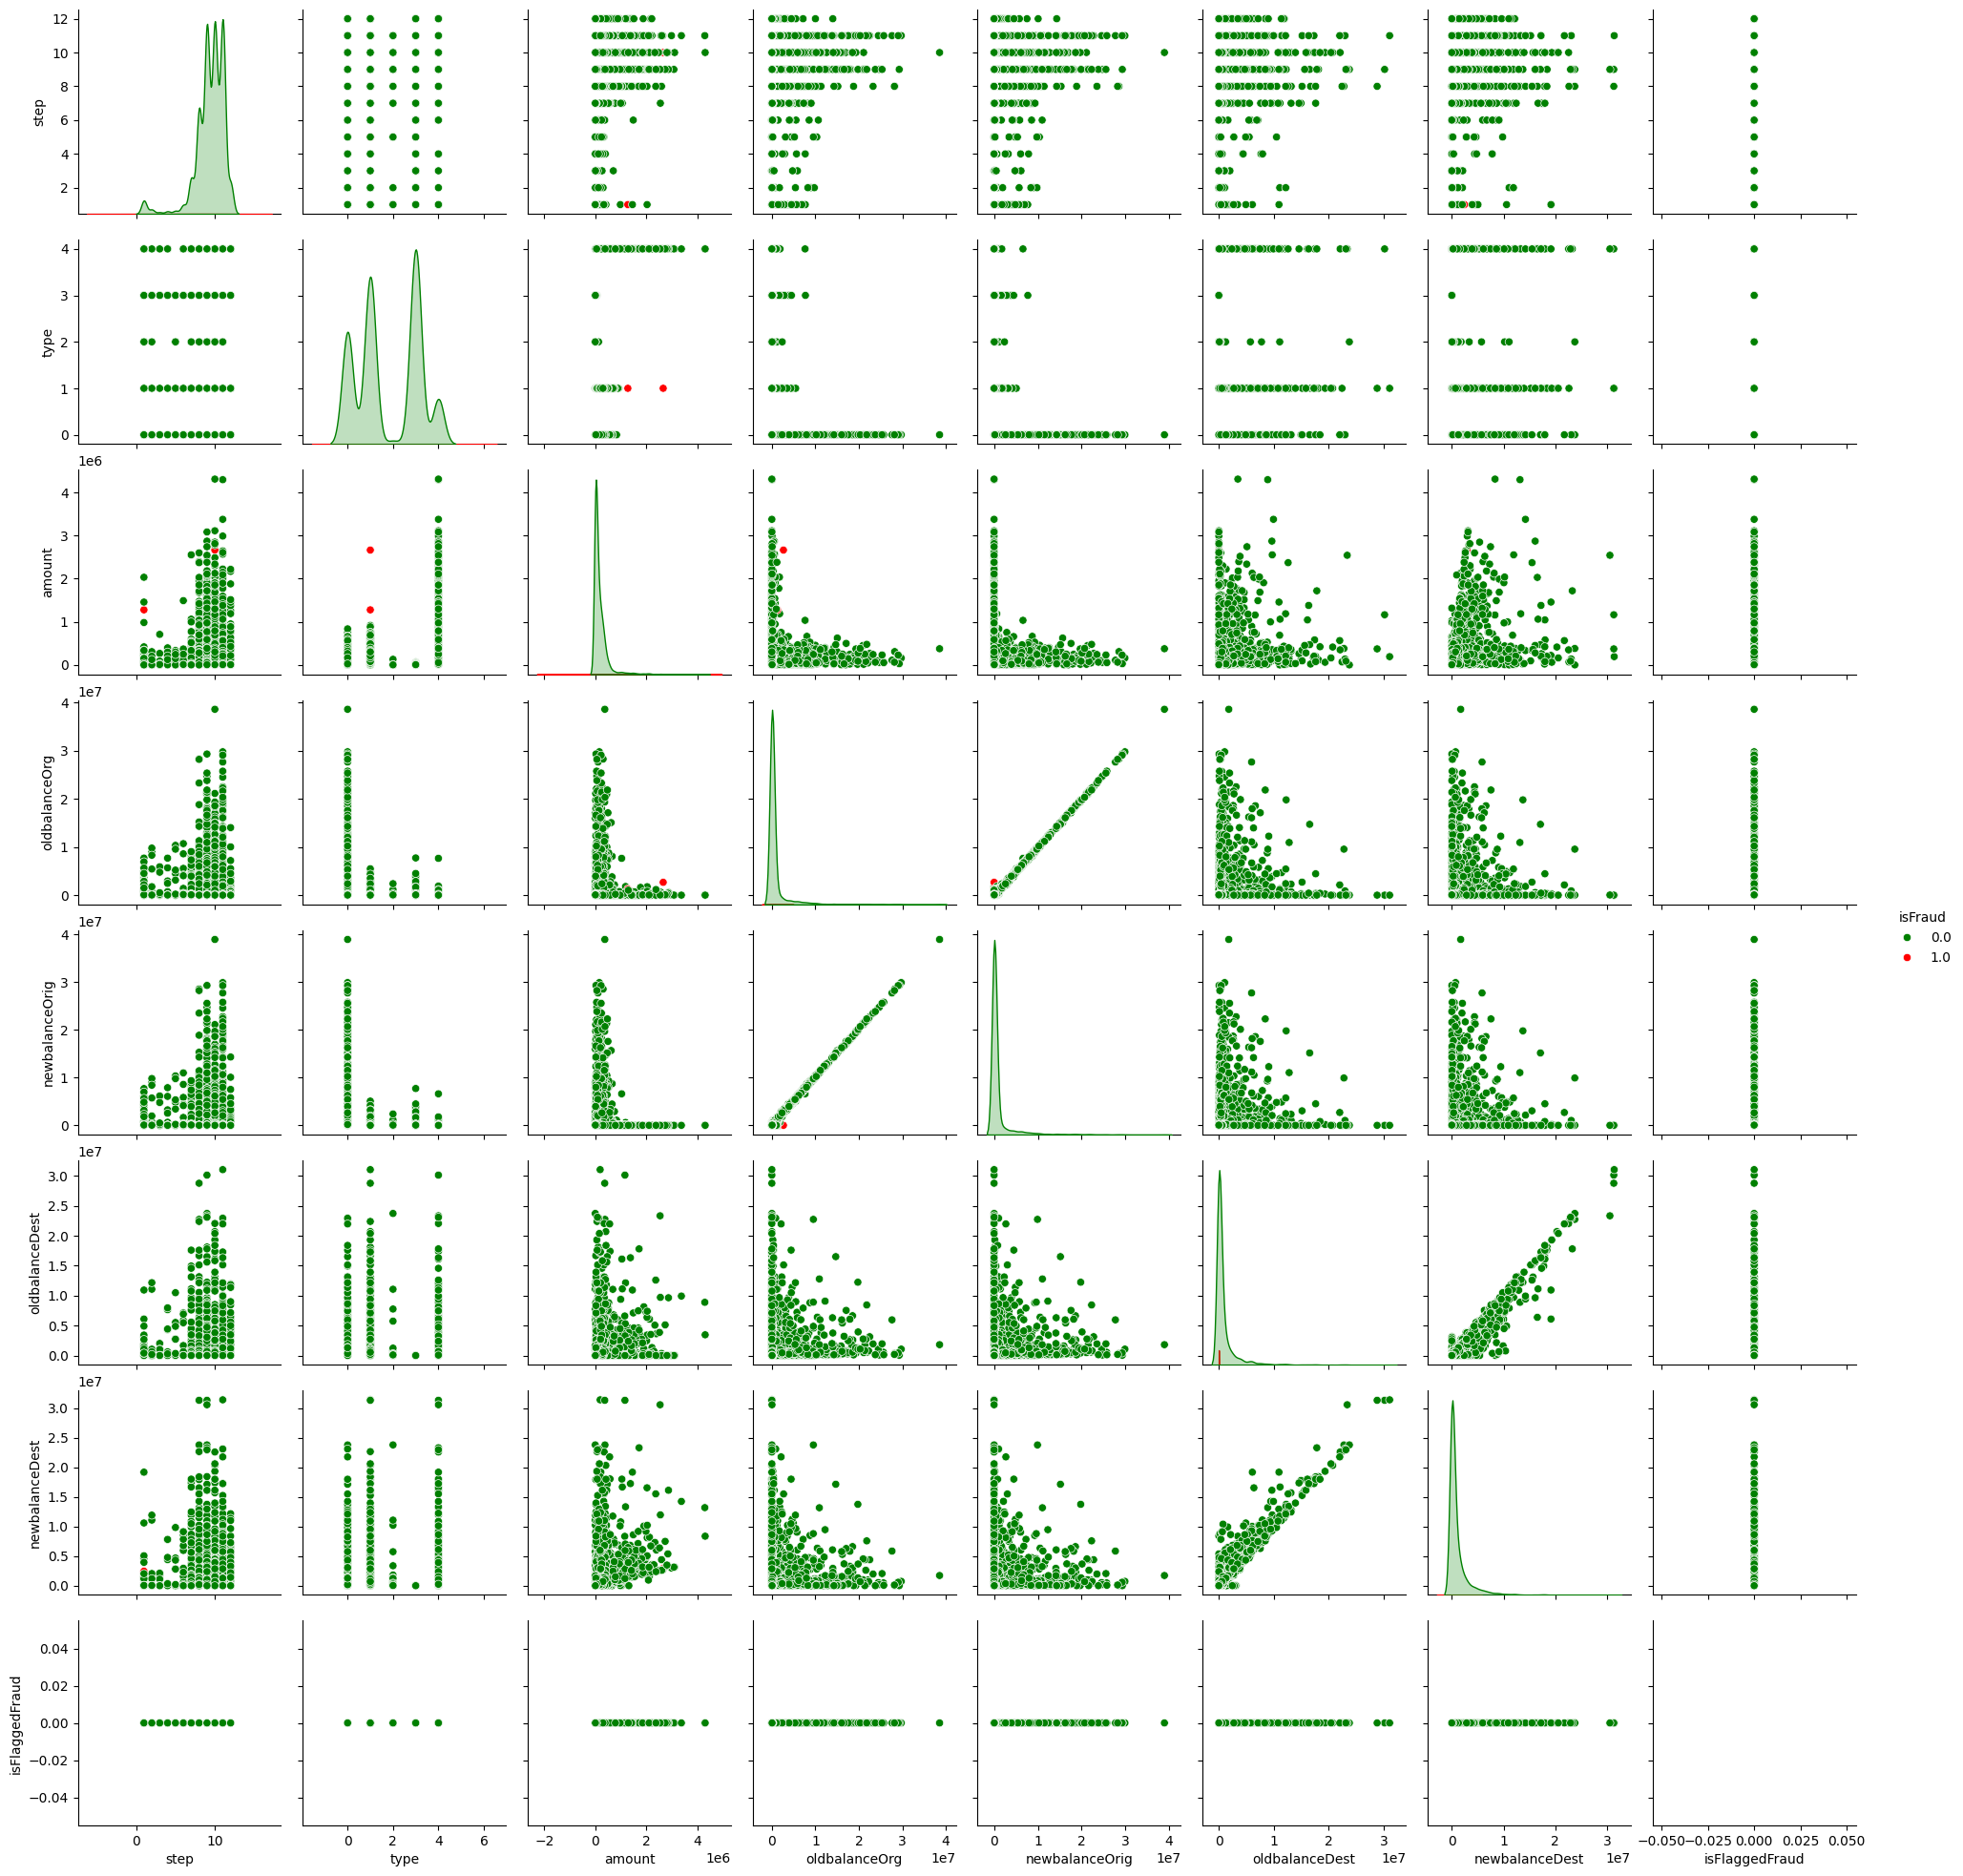

In [19]:
import seaborn as sns

# Selecting only relevant features for visualization
sampled_df = df.sample(5000)  # Sampling to reduce computational cost

sns.pairplot(sampled_df, hue="isFraud", diag_kind="kde", palette=['green', 'red'])
plt.show()


<ipython-input-20-8adb6dc4c500>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['type'], y=df['isFraud'], ci=None, palette='coolwarm')
<ipython-input-20-8adb6dc4c500>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['type'], y=df['isFraud'], ci=None, palette='coolwarm')


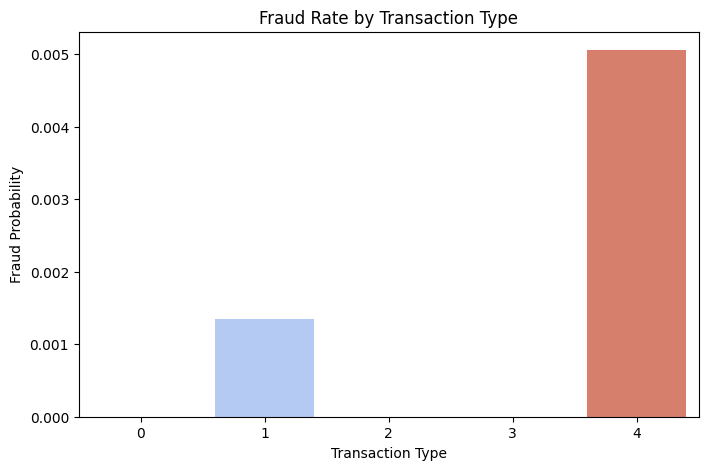

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['type'], y=df['isFraud'], ci=None, palette='coolwarm')
plt.title("Fraud Rate by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Probability")
plt.show()


# **Step 2: Data Exploration**

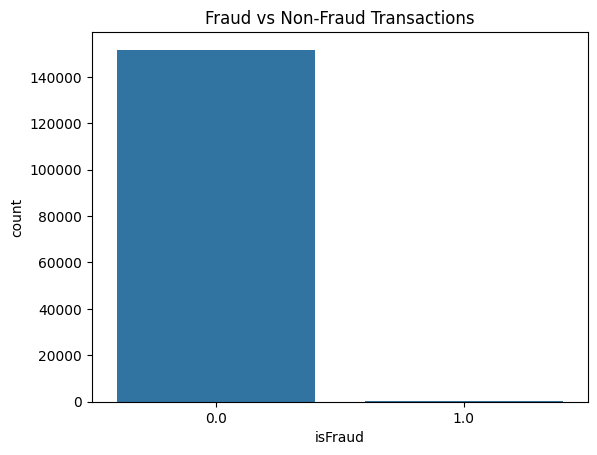

                step        amount  oldbalanceOrg  newbalanceOrig  \
count  151799.000000  1.517990e+05   1.517990e+05    1.517980e+05   
mean        9.333902  1.791774e+05   8.879109e+05    9.043402e+05   
std         1.906281  3.401606e+05   2.807531e+06    2.844268e+06   
min         1.000000  3.200000e-01   0.000000e+00    0.000000e+00   
25%         9.000000  1.111398e+04   0.000000e+00    0.000000e+00   
50%        10.000000  6.122687e+04   1.999000e+04    0.000000e+00   
75%        11.000000  2.230398e+05   1.956685e+05    2.262719e+05   
max        12.000000  1.000000e+07   3.893942e+07    3.894623e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    1.517980e+05    1.517980e+05  151798.000000        151798.0  
mean     9.137641e+05    1.180076e+06       0.000863             0.0  
std      2.384389e+06    2.705635e+06       0.029364             0.0  
min      0.000000e+00    0.000000e+00       0.000000             0.0  
25%      0.000000e+00  

In [6]:
# Checking the fraud distribution
sns.countplot(x='isFraud', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

# Display summary statistics
print(df.describe())



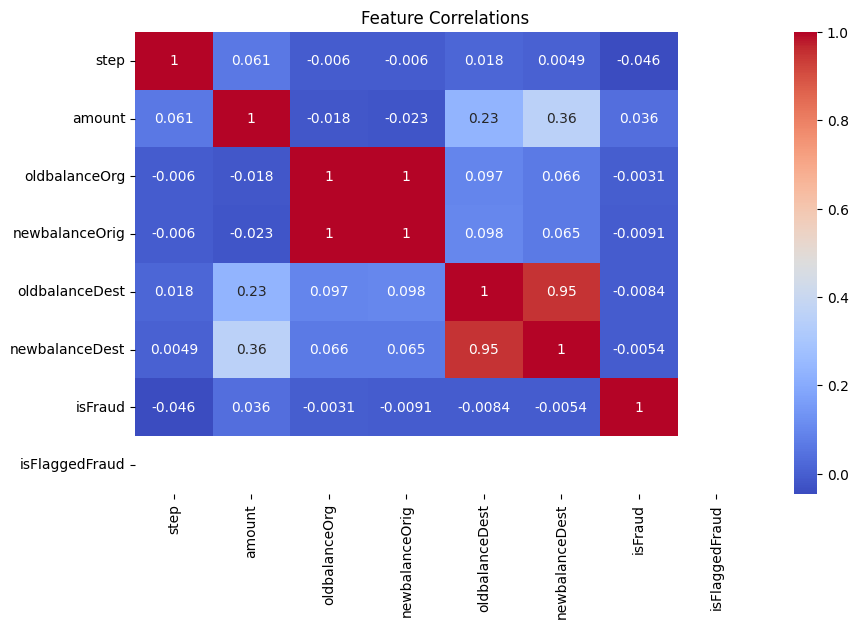

In [7]:
# Check correlation between features, excluding non-numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

# **Step 3: Data Preprocessing**

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding categorical feature 'type'
df['type'] = LabelEncoder().fit_transform(df['type'])

# Dropping irrelevant columns (identifiers)
df = df.drop(columns=['nameOrig', 'nameDest'])

# Selecting features and target variable
X = df.drop(columns=['isFraud'])  # Features
y = df['isFraud']  # Target

# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **[Step 4: Handling Class Imbalance]**

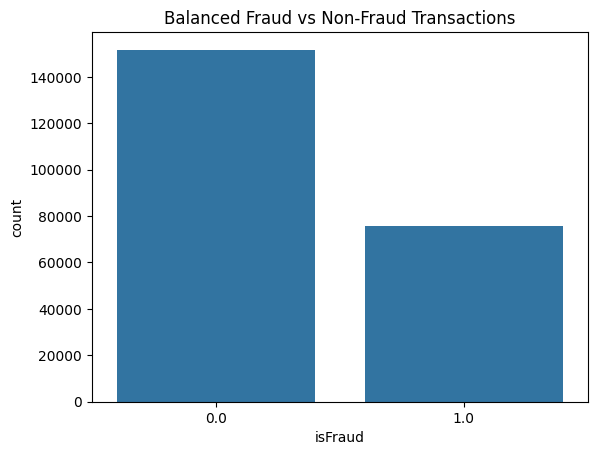

In [10]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy=0.5, random_state=42)

# Drop rows with NaN values in the target variable ('isFraud') before applying SMOTE
df_no_nan = df.dropna(subset=['isFraud'])
X_no_nan = df_no_nan.drop(columns=['isFraud'])
y_no_nan = df_no_nan['isFraud']

# Scaling numerical features
scaler = StandardScaler()
X_scaled_no_nan = scaler.fit_transform(X_no_nan) #Using scaled data without NaNs

X_resampled, y_resampled = smote.fit_resample(X_scaled_no_nan, y_no_nan) #Using data without NaNs

# Checking new class distribution
sns.countplot(x=y_resampled)
plt.title("Balanced Fraud vs Non-Fraud Transactions")
plt.show()


# **Step 5: Splitting the Data**
We divide the dataset into training (80%) and testing (20%) sets.

**Models Used:**

Logistic Regression

Random Forest

XGBoost

In [11]:
from sklearn.model_selection import train_test_split

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Checking the shape of train and test sets
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (182000, 8), Testing Set: (45500, 8)


# **Step 7: Model Evaluation**

We evaluate model performance using accuracy, recall, precision, F1-score, and AUC-ROC.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier # Assuming you want to use XGBoost
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [31]:
# Assuming X_resampled and y_resampled are defined from previous steps

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define and initialize the models within a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Training the models
for name, model in models.items():
    print(f"Training {name}...")  # Optional: Print to track progress
    model.fit(X_train, y_train)

# Evaluating all models
for name, model in models.items():
    y_pred = model.predict(X_test)

    print(f"\n🔹 Results for {name}:")
    print("✅ Accuracy:", accuracy_score(y_test, y_pred))
    print("✅ ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("✅ Classification Report:\n", classification_report(y_test, y_pred))
    print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Training Logistic Regression...
Training Random Forest...
Training XGBoost...

🔹 Results for Logistic Regression:
✅ Accuracy: 0.8816483516483516
✅ ROC AUC Score: 0.8491081778924511
✅ Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     30143
         1.0       0.88      0.75      0.81     15357

    accuracy                           0.88     45500
   macro avg       0.88      0.85      0.86     45500
weighted avg       0.88      0.88      0.88     45500

✅ Confusion Matrix:
 [[28613  1530]
 [ 3855 11502]]

🔹 Results for Random Forest:
✅ Accuracy: 0.9992087912087912
✅ ROC AUC Score: 0.9993070213722481
✅ Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     30143
         1.0       1.00      1.00      1.00     15357

    accuracy                           1.00     45500
   macro avg       1.00      1.00      1.00     45500
weighted avg       